# Milestones 1

---

## Introduction

> Perkenalkan nama saya Pascalis Farrel, student Hacktiv8 FTDS Batch 008.

### Dataset

Dataset ini mencakup informasi tentang:
- Pelanggan yang pergi dalam sebulan terakhir – kolomnya disebut Churn
- Layanan yang telah didaftarkan oleh setiap pelanggan – telepon, banyak saluran, internet, keamanan online, pencadangan online, perlindungan perangkat, dukungan teknis, dan streaming TV dan film
- Informasi akun pelanggan – sudah berapa lama mereka menjadi pelanggan, kontrak, metode pembayaran, tagihan tanpa kertas, tagihan bulanan, dan total tagihan
- Info demografis tentang pelanggan – jenis kelamin, rentang usia, dan jika mereka memiliki pasangan dan tanggungan. 

Dataset dapat dilihat di [kaggle](https://www.kaggle.com/blastchar/telco-customer-churnt).

### Objectives

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

## Import Libraries

Pada milestone 1 ini akan menggunakan library **warnings**, **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, **Pickle**, **Sckit-learn** , dan **Tensorflow**.

In [73]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC
from tensorflow.keras.models import Sequential, Model, Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist

Melakukan setting agar pandas menampilkan seluruh kolom pada dataframe.

In [74]:
pd.set_option('display.max_columns', None)

## Data Loading

Membuat dataframe bernama `df` dari file `WA_Fn-UseC_-Telco-Customer-Churn.csv`.

In [75]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Characteristics

In [76]:
df.shape

(7043, 21)

Dataset ini memiliki **7043 baris** dengan **21 kolom**.

In [77]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

Dikarenakan kolom `TotalCharges` memiliki values berupa numeric tetapi memiliki status string, maka telah diubah menjadi numeric.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari basic info ini dapat diketahui datafrane terbentuk dari:
- 2 kolom dengan tipe **float**
- 2 kolom dengan tipe **int**
- 17 kolom dengan tipe **object**

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


Distribusi dari kolom pada dataset kebanyakan memiliki distribusi yang cenderung normal (**Symmetrical Distribution**) contohnya pada kolom `tenure` dimana mean dari kolom tersebut berdekatan dengan mediannya.

## Data Cleaning

### Missing Values

Akan dilakukan pengecekan terhadap missing value.

In [80]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Diketahui terdapat 11 missing value pada kolom `TotalCharges`.

In [81]:
df = df.drop('customerID',axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Dikarenakan ID pelanggan tidak ada peran dalam tahap-tahap selanjutnya, maka akan di-drop.

### Duplicated Data

Pada bagian ini akan dilakukan pengecekan terhadap data duplikat.

In [82]:
df.duplicated().sum()

22

In [83]:
df = df.drop_duplicates()

In [84]:
df.duplicated().sum()

0

Diketahui ada 22 data duplikat maka telah dilakukan penghapusan data duplikat tersebut.

## Exploratory Data Analysis

In [85]:
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSupport - Unique Values: ['No' 'Yes' 'No internet service']
Column: StreamingTV - Unique Values: ['No' 'Yes' 'No internet servi

### Churn (Target Label)

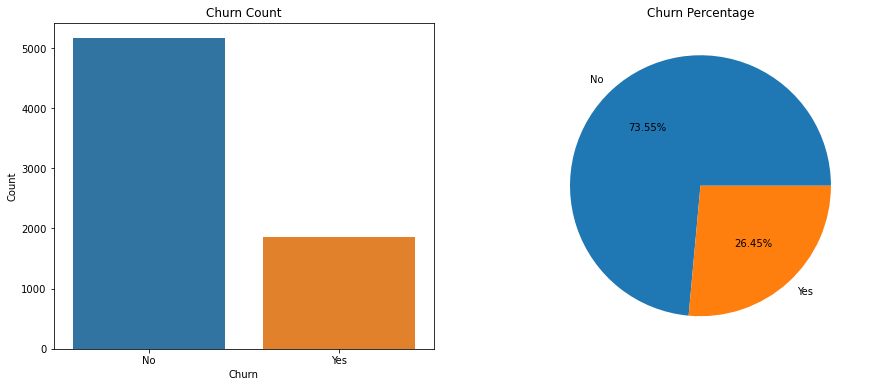

In [86]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].unique(), autopct='%.2f%%')
plt.title('Churn Percentage')
plt.show()

Diketahui mayoritas pelanggan tetap bersama perusahaan, dan hanya 26% pelanggan meninggalkan perusahaan.

### Gender

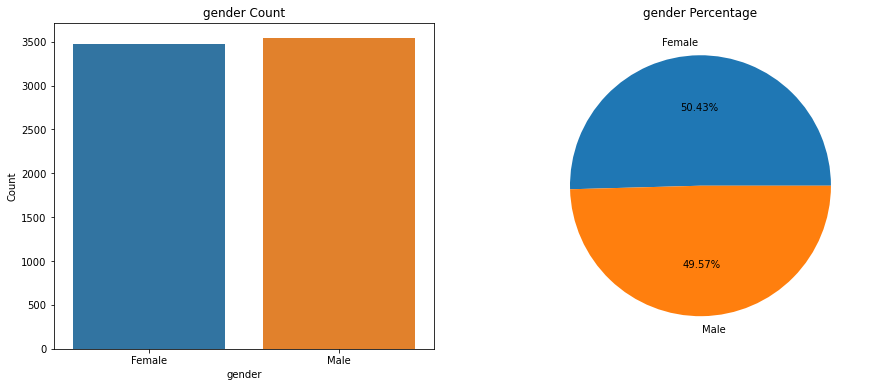

In [87]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=df)
plt.title('gender Count')
plt.xlabel('gender')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(df['gender'].value_counts(), labels=df['gender'].unique(), autopct='%.2f%%')
plt.title('gender Percentage')
plt.show()

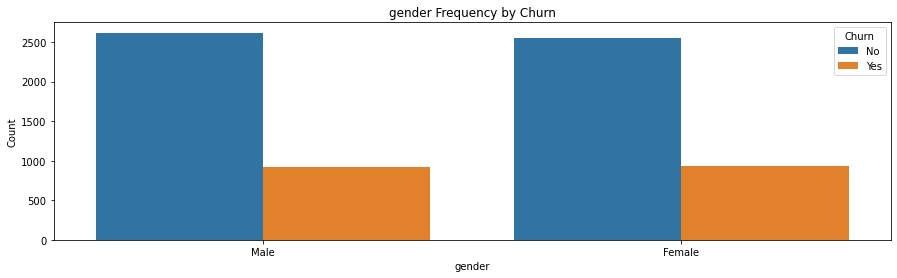

In [88]:
plt.figure(figsize=(15,4))
sns.countplot(x='gender', data=df, order=df.gender.value_counts().sort_values(ascending=False).index, hue='Churn')
plt.title('gender Frequency by Churn')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

Diketahui hanya ada perbedaan tipis dimana pria atau wanita memutuskan untuk meninggalkan atau menetap bersama perusahaan.

### Senior Citizen

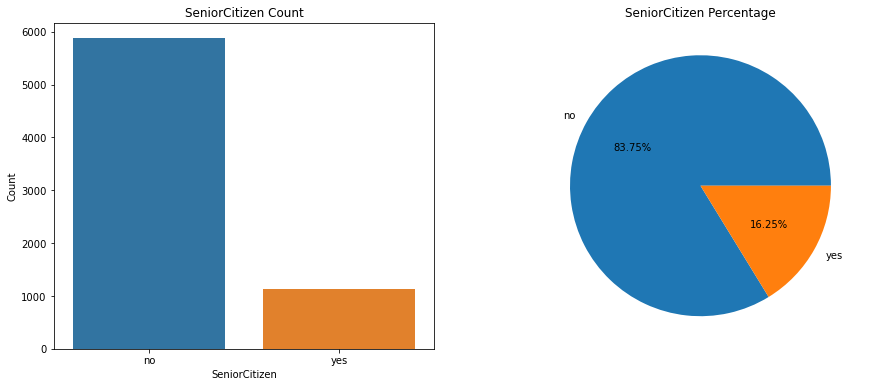

In [89]:
df["SeniorCitizen"].replace({1:"yes", 0:"no"}, inplace=True)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='SeniorCitizen', data=df)
plt.title('SeniorCitizen Count')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(df['SeniorCitizen'].value_counts(), labels=df['SeniorCitizen'].unique(), autopct='%.2f%%')
plt.title('SeniorCitizen Percentage')
plt.show()

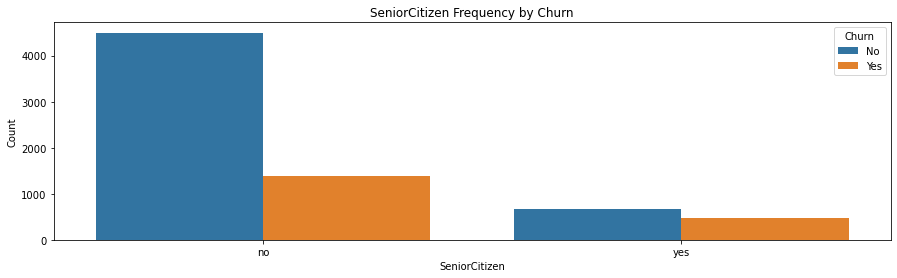

In [90]:
plt.figure(figsize=(15,4))
sns.countplot(x='SeniorCitizen', data=df, order=df.SeniorCitizen.value_counts().sort_values(ascending=False).index, hue='Churn')
plt.title('SeniorCitizen Frequency by Churn')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.show()

Diketahui mayoritas pelanggan yang termasuk atau tidak termasuk lansia menetap bersama perusahaan.

### Partner

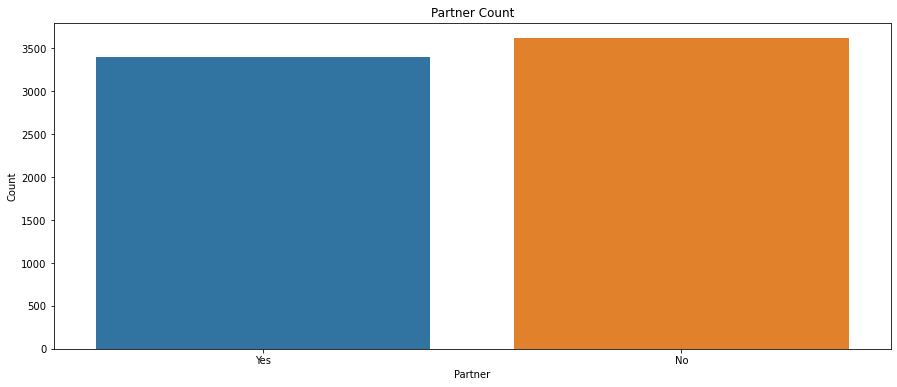

In [91]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Partner', data=df)
plt.title('Partner Count')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

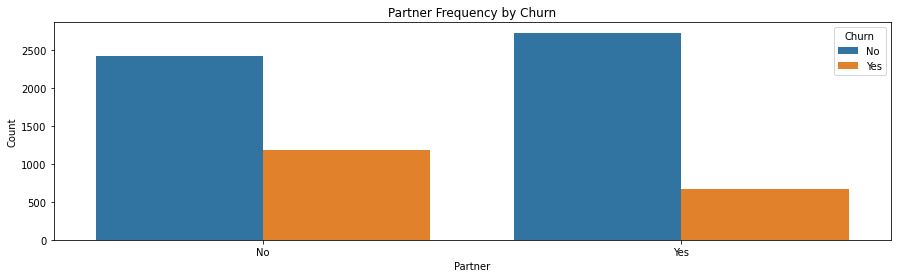

In [92]:
plt.figure(figsize=(15,4))
sns.countplot(x='Partner', data=df, order=df.Partner.value_counts().sort_values(ascending=False).index, hue='Churn')
plt.title('Partner Frequency by Churn')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

Diketahui mayoritas pelanggan yang tidak atau memiliki pasangan menetap bersama perusahaan.

### Dependents

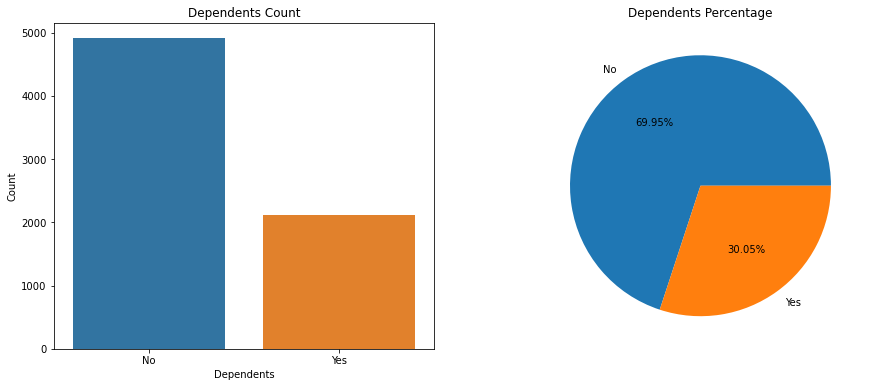

In [93]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Dependents', data=df)
plt.title('Dependents Count')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(df['Dependents'].value_counts(), labels=df['Dependents'].unique(), autopct='%.2f%%')
plt.title('Dependents Percentage')
plt.show()

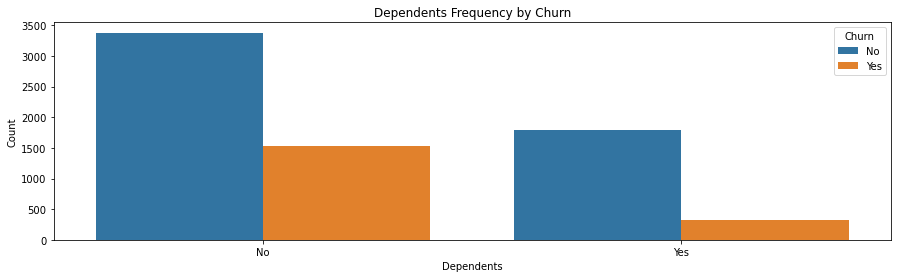

In [94]:
plt.figure(figsize=(15,4))
sns.countplot(x='Dependents', data=df, order=df.Dependents.value_counts().sort_values(ascending=False).index, hue='Churn')
plt.title('Dependents Frequency by Churn')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

Diketahui pelanggan yang memiliki atau tidak memiliki tanggungan menetap bersama perusahaan.

### Tenure

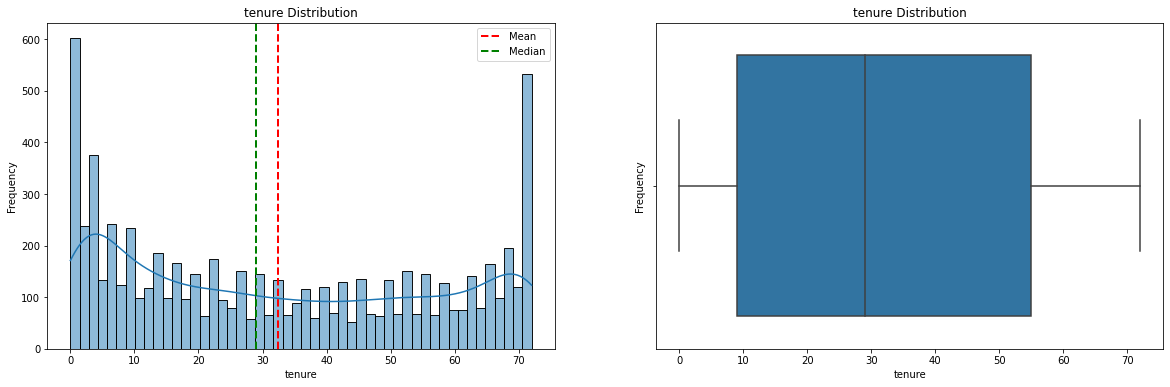

Skewness: 0.23554168006988707
Mean: 32.46944879646774
Median: 29.0


In [95]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.histplot(x='tenure', data=df, bins=50, kde=True)
plt.axvline(df.tenure.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df.tenure.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('tenure Distribution')
plt.xlabel('tenure')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='tenure', data=df)
plt.title('tenure Distribution')
plt.xlabel('tenure')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {df.tenure.skew()}')
print(f'Mean: {df.tenure.mean()}')
print(f'Median: {df.tenure.median()}')

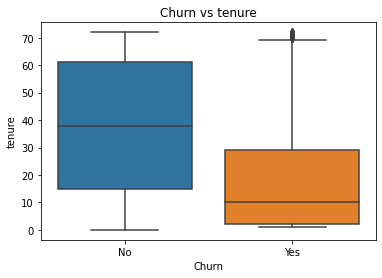

In [96]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn vs tenure')
plt.xlabel('Churn')
plt.ylabel('tenure')
plt.show()

Kolom `tenure` ini memiliki distribusi yang **Normal** karena nilai dari skewnessnya kurang dari 1 dengan mean dan mediannya beda tipis.
Diketahui pelanggan yang menetap bersama perusahaan memiliki total bulan yang lebih besar dibandingkan yang tidak menetap.

### Monthly Charges

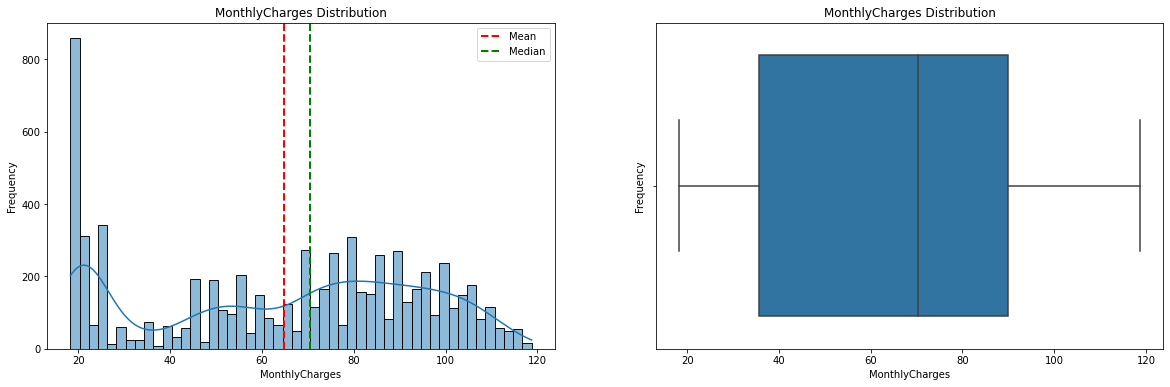

Skewness: -0.22409728909692606
Mean: 64.8518943170489
Median: 70.4


In [97]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.histplot(x='MonthlyCharges', data=df, bins=50, kde=True)
plt.axvline(df.MonthlyCharges.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df.MonthlyCharges.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('MonthlyCharges Distribution')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='MonthlyCharges', data=df)
plt.title('MonthlyCharges Distribution')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {df.MonthlyCharges.skew()}')
print(f'Mean: {df.MonthlyCharges.mean()}')
print(f'Median: {df.MonthlyCharges.median()}')

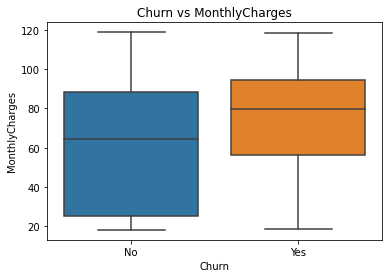

In [98]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn vs MonthlyCharges')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.show()

Kolom `MonthlyCharges` ini memiliki distribusi yang **Normal** karena nilai dari skewnessnya kurang dari 1 dengan mean dan mediannya yang beda tipis.
Diketahui pelanggan yang menetap bersama perusahaan memiliki tagihan per bulan yang lebih kecil dibandingkan yang tidak menetap.

### Total Charges

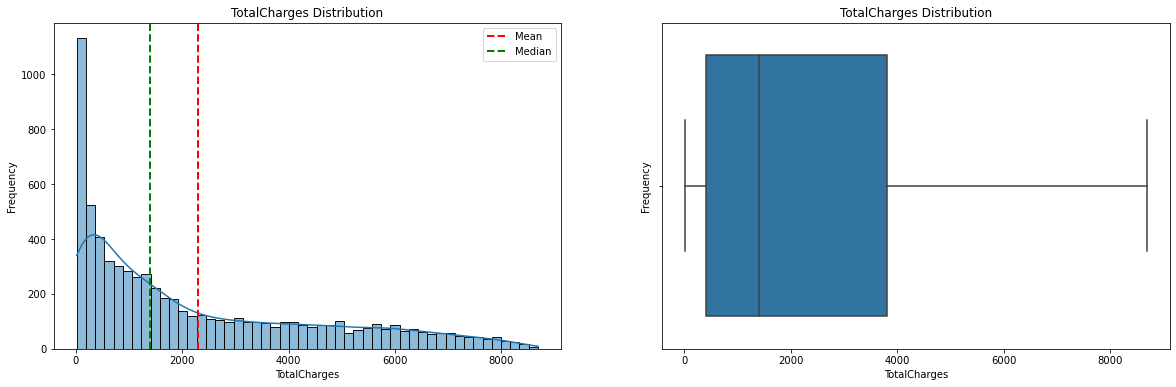

Skewness: 0.9583220586626408
Mean: 2290.353388017122
Median: 1403.875


In [99]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.histplot(x='TotalCharges', data=df, bins=50, kde=True)
plt.axvline(df.TotalCharges.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df.TotalCharges.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('TotalCharges Distribution')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='TotalCharges', data=df)
plt.title('TotalCharges Distribution')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {df.TotalCharges.skew()}')
print(f'Mean: {df.TotalCharges.mean()}')
print(f'Median: {df.TotalCharges.median()}')

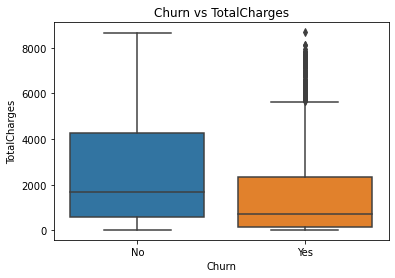

In [100]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Churn vs TotalCharges')
plt.xlabel('Churn')
plt.ylabel('TotalCharges')
plt.show()

Kolom `TotalCharges` ini memiliki distribusi yang **Normal** karena nilai dari skewnessnya kurang dari 1 dengan mean dan mediannya yang agak berjauhan.
Diketahui pelanggan yang menetap bersama perusahaan memiliki jumlah total tagihan yang lebih besar dibandingkan yang tidak menetap.

### Correlation Between Numeric Columns

In [101]:
yes_no_columns = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn','SeniorCitizen']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

Text(0.5, 1.0, 'Correlation Matrix')

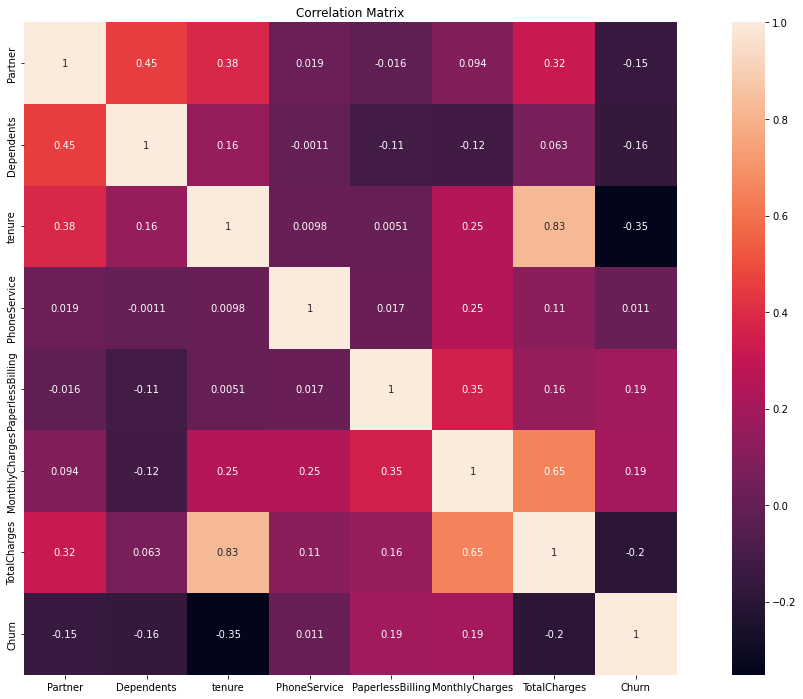

In [102]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), square=True, annot=True)
plt.title('Correlation Matrix')

In [103]:
yes_no_columns = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn','SeniorCitizen']
for col in yes_no_columns:
    df[col].replace({1: 'Yes',0: 'No'},inplace=True)

Diketahui kolom `Churn` atau kolom target memiliki korelasi terbesar dengan kolom `tenure`, dan `TotalCharges`.

## Data Preprocessing

### Data Inference
Pada bagian data inference ini akan mengambil sample sebanyak **20 data** dari dataframe utama.

In [104]:
# Get Data Inference
df_inf = df.sample(20, random_state=15)

# Remove Data Inference from main dataframe
df = df.drop(df_inf.index)

df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
9,Male,no,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
5894,Male,no,No,No,45,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.85,4740.00,Yes
3373,Female,yes,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.40,Yes
2881,Female,no,Yes,No,31,Yes,No,DSL,Yes,No,No,Yes,No,Yes,One year,Yes,Electronic check,64.00,1910.75,No
1449,Female,yes,No,No,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.50,106.80,No
171,Female,no,Yes,No,2,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.40,242.80,Yes
5380,Male,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.25,144.55,Yes
993,Female,no,Yes,Yes,10,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),26.10,225.55,No
3354,Female,no,No,No,54,No,No phone service,DSL,Yes,No,No,Yes,No,Yes,One year,No,Bank transfer (automatic),44.10,2369.70,No
4749,Male,no,No,No,5,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,49.20,216.90,Yes


### Split Data

Pada bagian ini akan dilakukan **splitting** terhadap dataset untuk dijadikan training, validation, dan testing set. Karena data ini jumlahnya sedikit, maka akan displit dengan perbandingan **7:2:1**, dimana:
- 70% data menjadi **training set**
- 20% data menjadi **validation set**
- 10% data menjadi **testing set**

Dan pada splitting ini akan menggunakan parameter `stratify` untuk menjaga proporsi dari label.

In [105]:
df_train_val, df_test = train_test_split(df, test_size=0.1, random_state=23, stratify=df.Churn)
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=23, stratify=df_train_val.Churn)

In [106]:
print(f'df_train proportion: {len(df_train) / len(df):.1f}')
print(f'df_val proportion: {len(df_val) / len(df):.1f}')
print(f'df_test proportion: {len(df_test) / len(df):.1f}')

df_train proportion: 0.7
df_val proportion: 0.2
df_test proportion: 0.1


In [107]:
preprocess_handling = pd.DataFrame({'columns':df_train.describe().columns, 'skew' : df.skew(axis=0)})
preprocess_handling.reset_index(drop=True, inplace=True)

preprocess_handling['status'] = np.where(preprocess_handling['skew'].abs()>0.5, 'Skewed', 'Normal')
preprocess_handling

,columns,skew,status
0,tenure,0.235570,Normal
1,MonthlyCharges,-0.224436,Normal
2,TotalCharges,0.958751,Skewed


### Handling Outlier
> Pada bagian ini akan pendeteksian outlier untuk kolom `tenure`, `MonthlyCharges` dan `TotalCharges`.

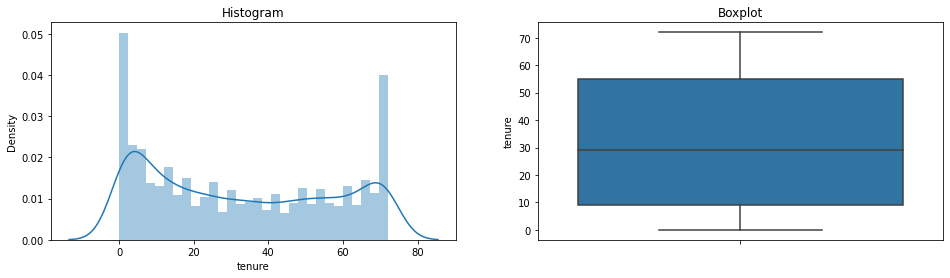

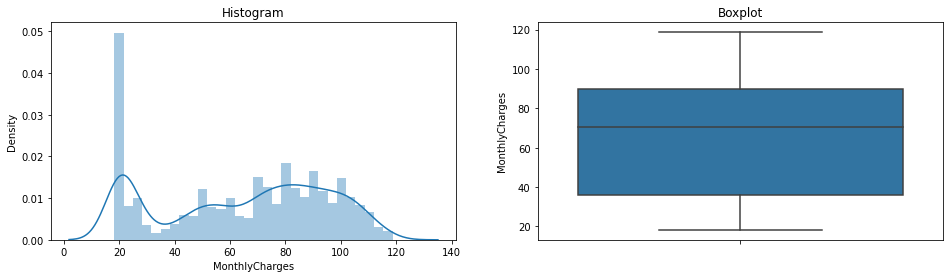

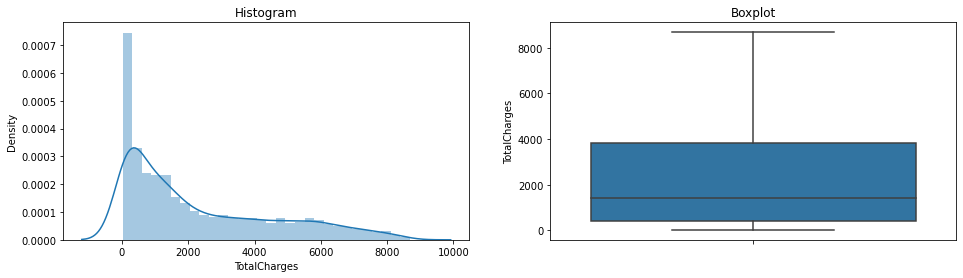

In [108]:
def diagnostic_plots(df_train, variables):
    # Define Figure Size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df_train[variables], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_train[variables])
    plt.title('Boxplot')

    plt.show

# Cek Outlier pada kolom 

diagnostic_plots(df_train, 'tenure')
diagnostic_plots(df_train, 'MonthlyCharges')
diagnostic_plots(df_train, 'TotalCharges')

### Handling Missing Values

In [109]:
df_train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
Churn               0
dtype: int64

In [110]:
df_val.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
Churn               0
dtype: int64

In [111]:
df_test.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
Churn               0
dtype: int64

In [112]:
df_inf.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [113]:
df_train = df_train.dropna()
df_val = df_val.dropna()
df_test = df_test.dropna()

df_train.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [114]:
df_val.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [115]:
df_test.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Diketahui ada beberapa missing value pada dataframe training set, testing set, dan validation set, maka telah dilakukan handling pada missing values tersebut.

### Feature Engineering

Berikut telah diputuskan untuk menggunakan semua kolom pada dataset untuk feature engineering.

In [116]:
X_train = df_train.drop(columns=['Churn'])
y_train = df_train.Churn
X_test = df_test.drop(columns=['Churn'])
y_test = df_test.Churn
X_val = df_val.drop(columns=['Churn'])
y_val = df_val.Churn

In [117]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4497,Male,yes,Yes,No,60,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.95,5867.00
210,Male,no,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),46.00,84.50
2430,Male,no,No,No,30,Yes,No,DSL,Yes,No,Yes,No,No,No,Two year,Yes,Mailed check,55.65,1653.85
785,Female,yes,No,No,46,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,110.00,4874.80
122,Male,no,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,229.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,Female,no,No,No,40,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.60,827.30
6839,Female,no,No,No,11,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.75,1129.75
4334,Female,no,No,No,11,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,76.40,838.70
4238,Male,no,Yes,Yes,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,1061.60


#### Pipeline

Pada bagian ini akan dibuat pipeline untuk melakukan normalisasi data (**scaling**) menggunakan `StandardScaler()` dan melakukan **encoding** menggunakan `OneHotEncoder()` sekaligus untuk membuat model. Membuat pipeline untuk melakukan prepocessing features, dimana:
- `num_pipe` adalah pipeline untuk **scaling** features numerical menggunakan `StandardScaler()`
- `cat_pipe` adalah pipeline untuk **encoding** features categorical menggunakan `OneHotEncoder()`

Lalu, kedua pipeline akan digabungkan menjadi 1 pipeline **preprocessing** menggunakan `ColumnTransformer()`.

In [118]:
# Numeric Features Scaling
num_pipe = Pipeline([('scaling', StandardScaler())])

# Categorical Features Encoding
cat_pipe = Pipeline([('encode', OneHotEncoder())])

# Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('num',num_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat',cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

In [119]:
X_train = preprocess.fit_transform(X_train)
X_test = preprocess.transform(X_test)
X_val = preprocess.transform(X_val)

In [120]:
label = LabelEncoder()

y_train = label.fit_transform(y_train)
y_test = label.transform(y_test)
y_val = label.transform(y_val)

## Model Definition

Berikut sequential dan functional api yang digunakan untuk membuat model.

### Sequential

In [121]:
seq = Sequential()
seq.add(Dense(20, activation='relu',input_shape=(46,)))
seq.add(Dense(10, activation='relu'))
seq.add(Dense(5, activation='relu'))
seq.add(Dense(1, activation='sigmoid'))

### Fuctional API

In [122]:
data_in = Input(shape=(46,))
hidden_1 = Dense(20,activation='relu')(data_in)
hidden_2 = Dense(10,activation='relu')(hidden_1)
hidden_3 = Dense(5,activation='relu')(hidden_2)
output = Dense(1,activation='sigmoid')(hidden_3)

fuc = Model(inputs= data_in, outputs = output)

## Model Training

## Sequential

In [123]:
seq.compile(loss = 'binary_crossentropy',
                optimizer= 'adamax',
                metrics=['Recall'])

train_seq = seq.fit(X_train,y_train, epochs = 200, validation_data=(X_val,y_val))

Epoch 1/200
158/158 [==============================] - 1s 2ms/step - loss: 0.6574 - recall: 0.2609 - val_loss: 0.5616 - val_recall: 0.1171
Epoch 2/200
158/158 [==============================] - 0s 982us/step - loss: 0.5024 - recall: 0.3000 - val_loss: 0.4766 - val_recall: 0.3363
Epoch 3/200
158/158 [==============================] - 0s 988us/step - loss: 0.4454 - recall: 0.4752 - val_loss: 0.4510 - val_recall: 0.4775
Epoch 4/200
158/158 [==============================] - 0s 1ms/step - loss: 0.4317 - recall: 0.5301 - val_loss: 0.4443 - val_recall: 0.5075
Epoch 5/200
158/158 [==============================] - 0s 1ms/step - loss: 0.4254 - recall: 0.5549 - val_loss: 0.4404 - val_recall: 0.5345
Epoch 6/200
158/158 [==============================] - 0s 950us/step - loss: 0.4221 - recall: 0.5474 - val_loss: 0.4380 - val_recall: 0.5225
Epoch 7/200
158/158 [==============================] - 0s 963us/step - loss: 0.4187 - recall: 0.5451 - val_loss: 0.4359 - val_recall: 0.5195
Epoch 8/200
158/158

In [124]:
metrics =pd.DataFrame(train_seq.history) #history kedua untuk mengakses history
metrics.head()

,loss,recall,val_loss,val_recall
0,0.657367,0.260902,0.561573,0.117117
1,0.502386,0.300000,0.476561,0.336336
2,0.445404,0.475188,0.450973,0.477477
3,0.431713,0.530075,0.444296,0.507508
4,0.425371,0.554887,0.440402,0.534535


<AxesSubplot:>

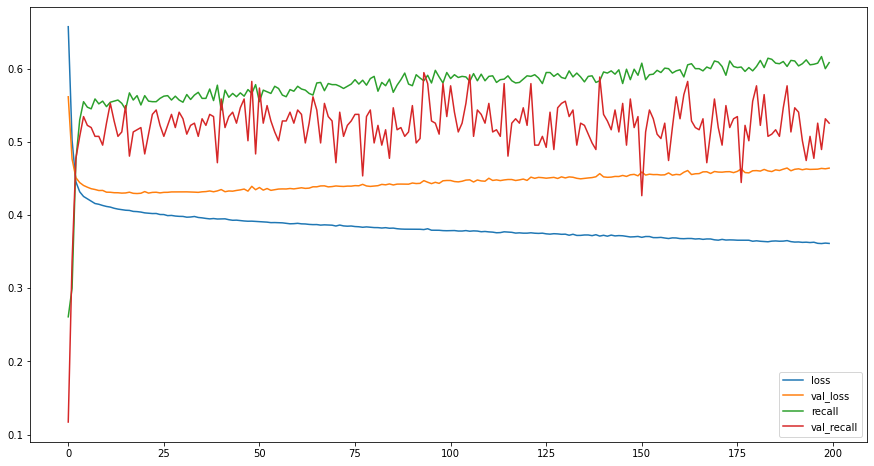

In [125]:
metrics[['loss','val_loss','recall','val_recall']].plot(figsize=(15,8))

## Fuctional API

In [126]:
fuc.compile(loss = 'binary_crossentropy',
                optimizer= 'adamax',
                metrics=['Recall'])

train_fuc = seq.fit(X_train,y_train, epochs = 200, validation_data=(X_val,y_val))

Epoch 1/200
158/158 [==============================] - 0s 1ms/step - loss: 0.3621 - recall: 0.5970 - val_loss: 0.4639 - val_recall: 0.5105
Epoch 2/200
158/158 [==============================] - 0s 944us/step - loss: 0.3608 - recall: 0.6098 - val_loss: 0.4654 - val_recall: 0.5796
Epoch 3/200
158/158 [==============================] - 0s 956us/step - loss: 0.3623 - recall: 0.6098 - val_loss: 0.4636 - val_recall: 0.5526
Epoch 4/200
158/158 [==============================] - 0s 975us/step - loss: 0.3618 - recall: 0.6038 - val_loss: 0.4634 - val_recall: 0.5435
Epoch 5/200
158/158 [==============================] - 0s 944us/step - loss: 0.3627 - recall: 0.6143 - val_loss: 0.4649 - val_recall: 0.5375
Epoch 6/200
158/158 [==============================] - 0s 956us/step - loss: 0.3611 - recall: 0.6098 - val_loss: 0.4647 - val_recall: 0.4955
Epoch 7/200
158/158 [==============================] - 0s 944us/step - loss: 0.3607 - recall: 0.6113 - val_loss: 0.4648 - val_recall: 0.4985
Epoch 8/200
158

In [127]:
metricsf =pd.DataFrame(train_fuc.history) #history kedua untuk mengakses history
metricsf.head()

,loss,recall,val_loss,val_recall
0,0.362062,0.596992,0.463903,0.510511
1,0.360825,0.609774,0.465403,0.579580
2,0.362271,0.609774,0.463585,0.552553
3,0.361828,0.603759,0.463445,0.543544
4,0.362721,0.614286,0.464897,0.537538


<AxesSubplot:>

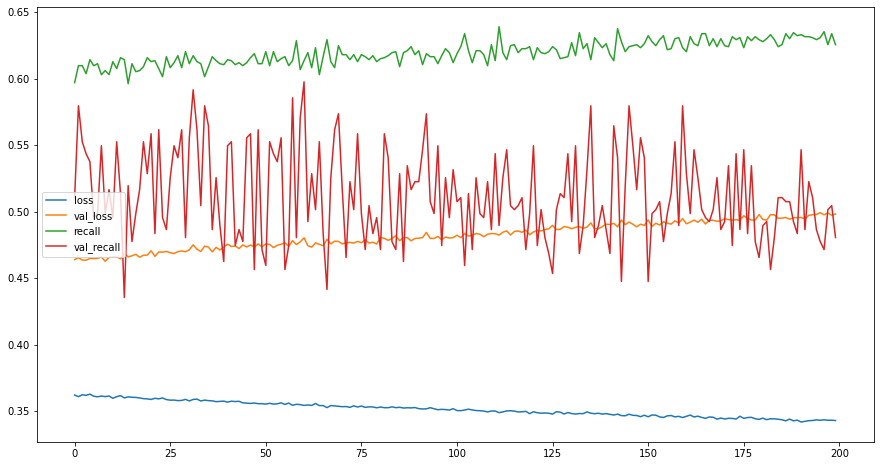

In [128]:
metricsf[['loss','val_loss','recall','val_recall']].plot(figsize=(15,8))

## Model Evaluation

## Sequential

In [129]:
#predict X_test
y_pred_test_seq = seq.predict(X_test)
y_pred_test_seq = np.where(y_pred_test_seq < 0.5, 0 , 1).squeeze()

#predict X_val
y_pred_val_seq = seq.predict(X_val)
y_pred_val_seq = np.where(y_pred_val_seq < 0.5, 0 , 1).squeeze()

print('Classification Reports X_test')
print(classification_report(y_test, y_pred_test_seq))
print(' ')
print('Classification Reports X_val')
print(classification_report(y_val, y_pred_val_seq))

Classification Reports X_test
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       515
           1       0.63      0.55      0.58       185

    accuracy                           0.79       700
   macro avg       0.74      0.71      0.72       700
weighted avg       0.79      0.79      0.79       700

 
Classification Reports X_val
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       926
           1       0.55      0.48      0.51       333

    accuracy                           0.76      1259
   macro avg       0.68      0.67      0.68      1259
weighted avg       0.75      0.76      0.75      1259



## Fuctional API

In [130]:
#predict X_test
y_pred_test_fuc = fuc.predict(X_test)
y_pred_test_fuc = np.where(y_pred_test_fuc < 0.5, 0 , 1).squeeze()

#predict X_val
y_pred_val_fuc = fuc.predict(X_val)
y_pred_val_fuc = np.where(y_pred_val_fuc < 0.5, 0 , 1).squeeze()

print('Classification Reports X_test')
print(classification_report(y_test, y_pred_test_fuc))
print(' ')
print('Classification Reports X_val')
print(classification_report(y_val, y_pred_val_fuc))

Classification Reports X_test
              precision    recall  f1-score   support

           0       0.75      0.15      0.25       515
           1       0.27      0.85      0.41       185

    accuracy                           0.34       700
   macro avg       0.51      0.50      0.33       700
weighted avg       0.62      0.34      0.29       700

 
Classification Reports X_val
              precision    recall  f1-score   support

           0       0.67      0.17      0.27       926
           1       0.25      0.78      0.38       333

    accuracy                           0.33      1259
   macro avg       0.46      0.47      0.32      1259
weighted avg       0.56      0.33      0.30      1259



## Model Improvement

In [131]:
seq_imp = Sequential()
seq_imp.add(Dense(25, activation='relu',input_shape=(46,)))
seq_imp.add(Dropout(rate=0.2))
seq_imp.add(Dense(10, activation='relu'))
seq_imp.add(Dense(1, activation='sigmoid'))

In [132]:
seq_imp.compile(loss = 'binary_crossentropy',
                optimizer= 'adam',
                metrics=['Recall'])

train_seq_imp = seq_imp.fit(X_train,y_train, epochs = 200, validation_data=(X_val,y_val))

Epoch 1/200
158/158 [==============================] - 1s 2ms/step - loss: 0.6434 - recall: 0.3248 - val_loss: 0.4908 - val_recall: 0.1111
Epoch 2/200
158/158 [==============================] - 0s 969us/step - loss: 0.4491 - recall: 0.4083 - val_loss: 0.4344 - val_recall: 0.4595
Epoch 3/200
158/158 [==============================] - 0s 1ms/step - loss: 0.4306 - recall: 0.4940 - val_loss: 0.4309 - val_recall: 0.4865
Epoch 4/200
158/158 [==============================] - 0s 975us/step - loss: 0.4287 - recall: 0.5000 - val_loss: 0.4302 - val_recall: 0.4745
Epoch 5/200
158/158 [==============================] - 0s 950us/step - loss: 0.4220 - recall: 0.5158 - val_loss: 0.4291 - val_recall: 0.4955
Epoch 6/200
158/158 [==============================] - 0s 931us/step - loss: 0.4222 - recall: 0.5128 - val_loss: 0.4284 - val_recall: 0.5315
Epoch 7/200
158/158 [==============================] - 0s 1ms/step - loss: 0.4200 - recall: 0.5030 - val_loss: 0.4288 - val_recall: 0.4775
Epoch 8/200
158/158

In [133]:
metrics_imp =pd.DataFrame(train_seq_imp.history) #history kedua untuk mengakses history
metrics_imp.head()

,loss,recall,val_loss,val_recall
0,0.643441,0.324812,0.490832,0.111111
1,0.449119,0.408271,0.434382,0.459459
2,0.430556,0.493985,0.430894,0.486486
3,0.428708,0.500000,0.430165,0.474474
4,0.421993,0.515789,0.429094,0.495495


<AxesSubplot:>

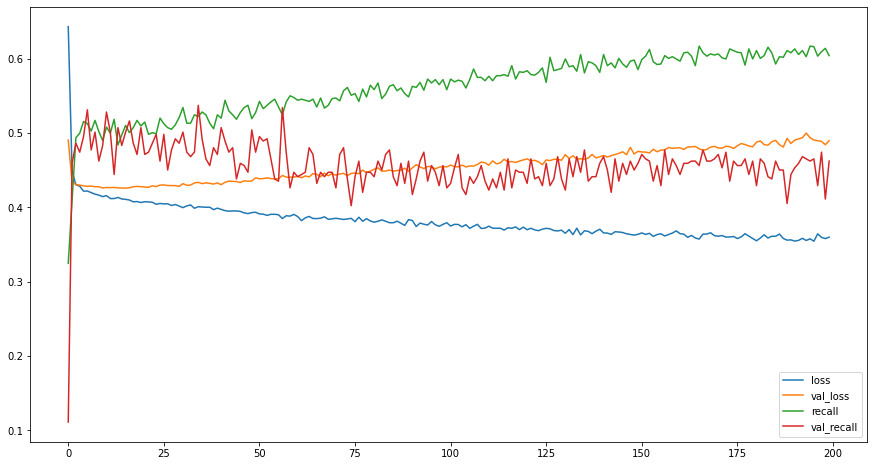

In [134]:
metrics_imp[['loss','val_loss','recall','val_recall']].plot(figsize=(15,8))

In [135]:
#predict
y_pred_test_seq_imp = seq_imp.predict(X_test)
y_pred_test_seq_imp = np.where(y_pred_test_seq_imp < 0.5, 0 , 1).squeeze()

#evaluate model
result_imp = seq_imp.evaluate(X_test)

print("\nEvaluate on test data")
result_imp = seq_imp.evaluate(X_test)
print('')

#print prediction
y_pred_test_seq_imp = pd.DataFrame({'Prediction':y_pred_test_seq_imp})
y_pred_test_seq_imp

22/22 [==============================] - 0s 715us/step - loss: 0.0000e+00 - recall: 0.0000e+00

Evaluate on test data
22/22 [==============================] - 0s 858us/step - loss: 0.0000e+00 - recall: 0.0000e+00



,Prediction
0,0
1,0
2,0
3,0
4,0
...,...
695,0
696,1
697,0
698,0


In [136]:
print('Classification Reports X_test')
print(classification_report(y_test, y_pred_test_seq_imp))

Classification Reports X_test
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       515
           1       0.65      0.49      0.56       185

    accuracy                           0.80       700
   macro avg       0.74      0.70      0.71       700
weighted avg       0.78      0.80      0.79       700



## Model Saving

In [137]:
seq_imp.save('model_keras.h5')

with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocess, file)

with open("preprocessor.pkl", "rb") as file:
    Pipeline = pickle.load(file)

from tensorflow.keras.models import load_model

savedModel=load_model('model_keras.h5')
savedModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 25)                1175      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_20 (Dense)            (None, 10)                260       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,446
Trainable params: 1,446
Non-trainable params: 0
_________________________________________________________________


## Model Testing (Data Inference)

Model yang sebelumnya melakukan prediksi terhadap data inference.

In [138]:
df_inf = df_inf.reset_index(drop=True)
df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,no,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
1,Male,no,No,No,45,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.85,4740.00,Yes
2,Female,yes,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.40,Yes
3,Female,no,Yes,No,31,Yes,No,DSL,Yes,No,No,Yes,No,Yes,One year,Yes,Electronic check,64.00,1910.75,No
4,Female,yes,No,No,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.50,106.80,No
5,Female,no,Yes,No,2,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.40,242.80,Yes
6,Male,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.25,144.55,Yes
7,Female,no,Yes,Yes,10,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),26.10,225.55,No
8,Female,no,No,No,54,No,No phone service,DSL,Yes,No,No,Yes,No,Yes,One year,No,Bank transfer (automatic),44.10,2369.70,No
9,Male,no,No,No,5,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,49.20,216.90,Yes


### Inference Prediction

In [139]:
X_inf = df_inf.drop(['Churn'], axis=1)
y_inf = df_inf['Churn']

# preprocessing
labelinf = LabelEncoder()

X_inf = Pipeline.transform(X_inf)
y_inf = labelinf.fit_transform(y_inf)


# inference tensorflow pipeline
inf_set = tf.data.Dataset.from_tensor_slices((X_inf, y_inf)).shuffle(10000).batch(32)

# prediction
y_pred_inf = seq_imp.predict(inf_set)

y_pred_inf = np.where(y_pred_inf < 0.5, 'no','yes').squeeze()
y_inf = np.where(y_inf == 0, 'no','yes').squeeze()


In [140]:
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Churn Prediction'])
y_pred_inf 

,Churn Prediction
0,no
1,yes
2,no
3,no
4,no
5,yes
6,no
7,no
8,no
9,yes


In [141]:
df_inf_result = pd.concat([df_inf, y_pred_inf], axis=1)
df_inf_result

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Prediction
0,Male,no,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,no
1,Male,no,No,No,45,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.85,4740.00,Yes,yes
2,Female,yes,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.40,Yes,no
3,Female,no,Yes,No,31,Yes,No,DSL,Yes,No,No,Yes,No,Yes,One year,Yes,Electronic check,64.00,1910.75,No,no
4,Female,yes,No,No,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.50,106.80,No,no
5,Female,no,Yes,No,2,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.40,242.80,Yes,yes
6,Male,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.25,144.55,Yes,no
7,Female,no,Yes,Yes,10,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),26.10,225.55,No,no
8,Female,no,No,No,54,No,No phone service,DSL,Yes,No,No,Yes,No,Yes,One year,No,Bank transfer (automatic),44.10,2369.70,No,no
9,Male,no,No,No,5,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,49.20,216.90,Yes,yes


## Conclusion

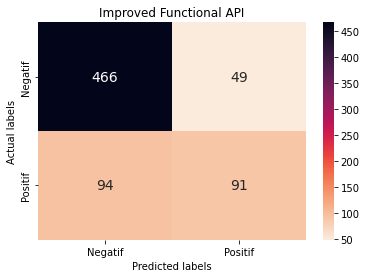

In [142]:
func_matrix= confusion_matrix(y_test, y_pred_test_seq_imp)

ax = sns.heatmap(func_matrix, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Improved Functional API")
plt.show()

Dari EDA dapat disimpulkan bahhwa Diketahui mayoritas pelanggan tetap bersama perusahaan, dan hanya 26% pelanggan meninggalkan perusahaan, hanya ada perbedaan tipis dimana pria atau wanita memutuskan untuk meninggalkan atau menetap bersama perusahaan. Mayoritas pelanggan yang termasuk atau tidak termasuk lansia, yang tidak atau memiliki pasangan, yang memiliki atau tidak memiliki tanggungan menetap bersama perusahaan. Pelanggan yang menetap bersama perusahaan memiliki total bulan yang lebih besar dibandingkan yang tidak menetap, memiliki tagihan per bulan yang lebih kecil dibandingkan yang tidak menetap, dan memiliki jumlah total tagihan yang lebih besar dibandingkan yang tidak menetap.

Untuk model sequential setelah melalui improvement, ditemukan bahwa model masih termasuk over-fit dikarenakan nilai loss antara training-set dan validation-set semakin jauh, seiring bertambahnya epoch.
Ditemukan dari hasil klasifikasi, nilai recall dari model untuk label churn masih belum cukup tinggi. Maka implementasi model dalam kasus nyata belum dapat dilaksanakan.
Nilai recall dipertimbangkan karena model sebisa mungkin meminimalkan jumlah false negative, dimana false negative yang dimaksud adalah model yang seharusnya mampu memprediksi pelanggan yang benar-benar meninggalkan perusahaan(True postive), model malah menganggap mereka masih menetap dengan perusahaan.